In [1]:
import json
import pandas as pd
import urllib.parse
import requests
import re

In [40]:
headers={"User-agent" : "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/110.0"}

test=requests.get("https://www.bbc.co.uk/robots.txt", headers=headers)

res={"User-Agent":{"Disallow":[], "Allow":[]}, "Sitemap": []}
for k in test.text.splitlines():
    if len(k)!=0 and k[0]!="#": # on évite les lignes commentées ou vides
        if "user-agent:" in k.lower():
            key=k.split(":", 1)[1].strip(' ')  # la clé va passer de user-agent en user-agent 
        
        elif "disallow" in k.lower() and key=="*": #tant que la clé vaut * on ajoute
            res["User-Agent"]["Disallow"].append(k.split(":",1)[1].strip(' '))
        elif "allow" in k.lower() and key=="*": #tant que la clé vaut * on ajoute
            res["User-Agent"]["Allow"].append(k.split(":",1)[1].strip(' '))
        elif "sitemap" in k.lower() and "http" in k: #on prend tous les sitemaps
            res["Sitemap"].append(k.split(":", 1)[1].strip(' '))


In [41]:
res["Sitemap"]


['https://www.bbc.co.uk/sitemap.xml',
 'https://www.bbc.co.uk/sitemaps/https-index-uk-archive.xml',
 'https://www.bbc.co.uk/sitemaps/https-index-uk-news.xml',
 'https://www.bbc.co.uk/food/sitemap.xml',
 'https://www.bbc.co.uk/bitesize/sitemap/sitemapindex.xml',
 'https://www.bbc.co.uk/teach/sitemap/sitemapindex.xml',
 'https://www.bbc.co.uk/sitemaps/https-index-uk-archive_video.xml',
 'https://www.bbc.co.uk/sitemaps/https-index-uk-video.xml',
 'https://www.bbc.co.uk/sitemaps/sitemap-uk-ws-topics.xml',
 'https://www.bbc.co.uk/sport/sitemap.xml',
 'https://www.bbc.co.uk/sitemaps/sitemap-uk-topics.xml',
 'https://www.bbc.co.uk/ideas/sitemap.xml']

In [42]:
res["User-Agent"]

{'Disallow': ['/bitesize/search$',
  '/bitesize/search/',
  '/bitesize/search?',
  '/cbbc/search$',
  '/cbbc/search/',
  '/cbbc/search?',
  '/cbeebies/search$',
  '/cbeebies/search/',
  '/cbeebies/search?',
  '/chwilio/',
  '/chwilio$',
  '/chwilio?',
  '/iplayer/bigscreen/',
  '/iplayer/cbbc/episodes/',
  '/iplayer/cbbc/search',
  '/iplayer/cbeebies/episodes/',
  '/iplayer/cbeebies/search',
  '/iplayer/search',
  '/indepthtoolkit/smallprox$',
  '/indepthtoolkit/smallprox/',
  '/modules/musicnav/language/',
  '/news/0',
  '/radio/aod/',
  '/radio/aod$',
  '/radio/imda',
  '/radio/player/',
  '/radio/player$',
  '/search/',
  '/search$',
  '/search?',
  '/sport/videos/*',
  '/sounds/player/',
  '/sounds/player$',
  '/ugc$',
  '/ugc/',
  '/ugcsupport$',
  '/ugcsupport/',
  '/userinfo/',
  '/userinfo',
  '/food/favourites',
  '/food/menus/*/shopping-list',
  '/food/recipes/*/shopping-list',
  '/food/search*?*',
  '/sounds/search$',
  '/sounds/search/',
  '/sounds/search?',
  '/ws/includes

In [20]:
f = open('url_500_11.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)
df_json=pd.DataFrame(data).T
f.close()

In [21]:
(~df_json.isna()).sum()

robots          3417
all_links       3417
xml_filter      3417
news_filter     1355
index_filter     994
dtype: int64

In [22]:
len(data)

5994

In [23]:
df_json.head(5)

,robots,all_links,xml_filter,news_filter,index_filter
https://news.yahoo.com,User-agent: *\nDisallow: /caas/\nDisallow: /_t...,[https://news.yahoo.com/sitemaps/news-sitemap_...,[https://news.yahoo.com/sitemaps/news-sitemap_...,[https://news.yahoo.com/sitemaps/news-sitemap_...,[https://news.yahoo.com/sitemaps/news-sitemap_...
https://www.dailymail.co.uk,# Robots.txt for https://www.dailymail.co.uk/ ...,"[https://www.dailymail.co.uk/, https://www.dai...",[https://www.dailymail.co.uk/google-news-sitem...,[https://www.dailymail.co.uk/google-news-sitem...,None
https://www.globalsecurity.org,None,None,None,None,None
https://timesofindia.indiatimes.com,Sitemap: https://timesofindia.indiatimes.com/s...,[https://timesofindia.indiatimes.com/sitemap/t...,[https://timesofindia.indiatimes.com/sitemap/t...,None,[https://timesofindia.indiatimes.com/staticsit...
https://menafn.com,#\r\n# robots.txt\r\n#\r\n# This file is to pr...,"[http://example.com/robots.txt, http://example...","[http://example.com/site/robots.txt, https://m...",[https://menafn.com/updates/sitemap_news_en.xm...,"[https://menafn.com/updates/sitemap_index.xml,..."


In [24]:
url_news=df_json.loc[:, "news_filter"].dropna()
url_news

https://news.yahoo.com            [https://news.yahoo.com/sitemaps/news-sitemap_...
https://www.dailymail.co.uk       [https://www.dailymail.co.uk/google-news-sitem...
https://menafn.com                [https://menafn.com/updates/sitemap_news_en.xm...
https://www.hindustantimes.com    [https://www.hindustantimes.com/sitemap/news.xml]
https://www.theepochtimes.com     [https://www.theepochtimes.com/sitemap/sitemap...
                                                        ...                        
https://www.highsnobiety.com            [https://highsnobiety.com/sitemap-news.xml]
https://www.droid-life.com            [https://www.droid-life.com/news-sitemap.xml]
https://raillynews.com                   [https://raillynews.com/sitemap_index.xml]
https://www.themercury.com.au      [https://www.themercury.com.au/news-sitemap.xml]
https://pcr-online.biz                    [https://pcr-online.biz/sitemap-news.xml]
Name: news_filter, Length: 1355, dtype: object

In [25]:
list_list_path=url_news.apply(lambda liste_url: [urllib.parse.urlparse(k).path for k in  liste_url ])

paths=pd.Series([ url for list_url in list_list_path for url in list_url ]).value_counts()
paths.iloc[:15]

/tncms/sitemap/editorial.xml                            1446
/news-sitemap.xml                                        253
/sitemap.xml                                             239
/sitemap-news.xml                                        176
/news-sitemap-content.xml                                116
/sitemap_index.xml                                       107
/arc/outboundfeeds/news-sitemap-index/category/news/      96
/sitemap_news.xml                                         53
/sitemaps/googlenews                                      31
/arc/outboundfeeds/sitemap-news/                          25
/google-news-sitemap.xml                                  24
/arc/outboundfeeds/news-sitemap-index                     23
/arc/outboundfeeds/sitemap-index/                         22
/wp-sitemap.xml                                           21
/sitemap-google-news.xml                                  20
Name: count, dtype: int64

In [7]:
urllib.parse.urlparse("https://pcr-online.biz/sitemap-news.xml").path

'/sitemap-news.xml'

<AxesSubplot:ylabel='Frequency'>

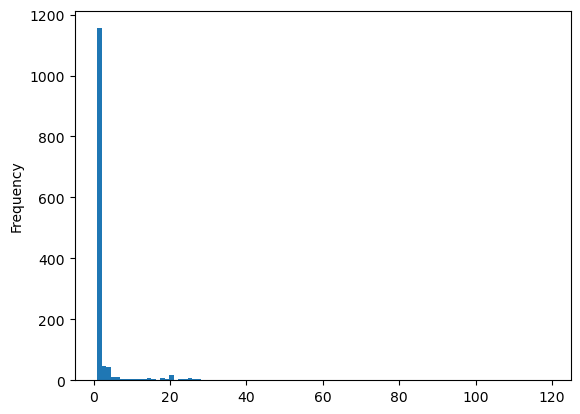

In [8]:
url_news.apply(lambda liste_url: len(liste_url)).sort_values().plot.hist(stacked=True, bins=100)

In [12]:
list_list_path=df_json.loc[:, "xml_filter"].dropna().apply(lambda liste_url: [urllib.parse.urlparse(k).path for k in  liste_url ])

paths=pd.Series([ url for list_url in list_list_path for url in list_url ]).value_counts()
paths.iloc[:15]

/tncms/sitemap/editorial.xml                            9428
/sitemap.xml                                            2509
/sitemap_index.xml                                       989
/news-sitemap.xml                                        253
/site/robots.txt                                         224
/index.php                                               218
/sitemap-news.xml                                        176
/wp-sitemap.xml                                          170
/arc/outboundfeeds/sitemap-index/                        138
/news-sitemap-content.xml                                116
/arc/outboundfeeds/sitemap-section-index/                 99
/arc/outboundfeeds/video-sitemap/                         99
/arc/outboundfeeds/news-sitemap-index/category/news/      96
/sitemap-latest.xml                                       89
/sitemap.rss                                              58
Name: count, dtype: int64

In [16]:
2509+989

3498

In [22]:
df_json.loc[df_json.isna().all(axis=1), :]

,robots,all_links,xml_filter,news_filter,index_filter
https://www.globalsecurity.org,None,None,None,None,None
https://www.marketscreener.com,None,None,None,None,None
https://www.miragenews.com,None,None,None,None,None
https://www.thenews.com.pk,None,None,None,None,None
https://www.bignewsnetwork.com,None,None,None,None,None
...,...,...,...,...,...
https://www.idea.int,None,None,None,None,None
https://www.civilsociety.co.uk,None,None,None,None,None
https://mof.gov.ae,None,None,None,None,None
https://www.tahoedailytribune.com,None,None,None,None,None


In [2]:
import requests
import re
import sys
import numpy as np
url = "https://www.foxnews.com/sitemap.xml?type=articles&page=100"
requesting = requests.get(url)

In [3]:
all_links=list(filter(lambda x: "climat" in x.lower(), list(map(lambda x:"".join(x),
                        re.findall(r"(http|ftp|https)(:\/\/[\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])", requesting.text)))))

In [4]:
all_links

['https://www.foxnews.com/us/climate-change-poses-significant-risk-to-us-military-report-says',
 'https://www.foxnews.com/world/the-latest-un-officials-say-20-nations-to-join-climate-pact',
 'https://www.foxnews.com/world/paris-climate-change-agreement-passes-key-threshold',
 'https://www.foxnews.com/world/the-latest-climate-deal-tops-required-55-ratifications',
 'https://www.foxnews.com/world/eu-chief-says-blocs-credibility-at-stake-over-climate-pact',
 'https://www.foxnews.com/world/un-ready-to-implement-climate-deal-in-morocco',
 'https://www.foxnews.com/world/india-to-ratify-paris-agreement-on-climate-change',
 'https://www.foxnews.com/world/nobel-prize-for-colombia-peace-deal-or-un-climate-pact',
 'https://www.foxnews.com/world/eu-nations-approve-ratification-of-climate-change-pact',
 'https://www.foxnews.com/world/paris-climate-pact-set-to-enter-force-after-eu-greenlight',
 'https://www.foxnews.com/world/india-set-to-ratify-paris-climate-change-agreement-at-un',
 'https://www.fox

In [28]:
html_in_Mo=np.mean(np.array(list(map(lambda x:sys.getsizeof(x), all_links))))/(10**6)

In [29]:
html_in_Mo*(6000*4*366*10)

11750.771626837317

In [36]:
df_json.loc[:, "xml_filter"].dropna().apply(lambda liste_url:[k for k in liste_url if "sitemap.xml" in k or "sitemap_index.xml" in k])

https://news.yahoo.com                                                                []
https://www.dailymail.co.uk            [https://www.dailymail.co.uk/google-news-sitem...
https://timesofindia.indiatimes.com                                                   []
https://menafn.com                     [https://menafn.com/updates/sitemap_index.xml,...
https://www.hindustantimes.com                                                        []
                                                             ...                        
https://www.troyrecord.com                      [https://www.troyrecord.com/sitemap.xml]
https://raillynews.com                        [https://raillynews.com/sitemap_index.xml]
https://www.themercury.com.au          [https://www.themercury.com.au/sitemap.xml, ht...
https://www.wallowa.com                            [https://www.wallowa.com/sitemap.xml]
https://pcr-online.biz                              [https://pcr-online.biz/sitemap.xml]
Name: xml_filter, Len